<a href="https://colab.research.google.com/github/anmolkumar0717/pyTorch/blob/main/02_Pytorch_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification of neural network

###**Classification is a problem of predicting whether something is one thing or Another (there can be multiple thing as options).


#1.Make a classification data and get it ready



In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

#make 1000 samples

n_samples=1000

X,Y= make_circles(n_samples,
                  noise=0.03,
                  random_state=42)

len(X),len(Y)

print(f"First 5 sample of the X:\n{X[:5]}")
print()
print(f"First 5 smaple of the Y:\n{Y[:5]}")

First 5 sample of the X:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 smaple of the Y:
[1 1 1 1 0]


In [ ]:
Y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
#make dataframe of circle sample data
import pandas as pd

circles=pd.DataFrame({"X1":X[:,0],
                      "X2":X[:,1],
                     "Label":Y})

circles.head(10)

,X1,X2,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


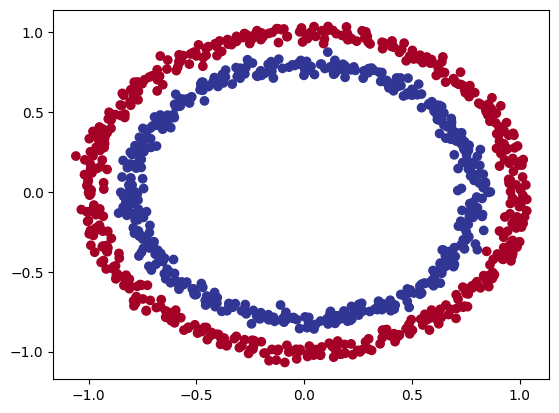

In [ ]:
#Visualize

import matplotlib.pyplot as plt

plt.scatter(x=X[:,0],
            y=X[:,1],
            c=Y,
            cmap=plt.cm.RdYlBu)

In [ ]:
# Convert the type to tensor
import torch
X=torch.from_numpy(X).type(torch.float)
Y=torch.from_numpy(Y).type(torch.float)

X[:5],Y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
#create a training and testing sets

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,
                                               Y,
                                               test_size=0.2,
                                               random_state=42)

len(X_train),len(X_test),len(Y_train),len(Y_test)

(800, 200, 800, 200)

In [ ]:
# View the FIrst sample of the x and y

X_sample=X[0]

Y_sample=Y[0]

print(f"First sample of the x is {X_sample}")
print(f"First sample of the y is {Y_sample}")

First sample of the x is tensor([0.7542, 0.2315])
First sample of the y is 1.0


In [ ]:
from torch import nn

device="cuda" if torch.cuda.is_available() else "cpu"

device

'cpu'

In [ ]:
#we have setup the device agnostic code


#construct a model thst subclasses the nn.Module


class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    ##creating two nn.linear layer that capable of handling the shape of the our data

    self.layer_1=nn.Linear(in_features=2,out_features=5)

    self.layer_2=nn.Linear(in_features=5 ,out_features=1)



  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.layer_2(self.layer_1(x))      # x--> layer_1 --> layer_2 --> Output



model0=CircleModelV0().to(device)
model0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
# Another method for creating a two layer nueral network model

class NewModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.two_layer=nn.Sequential(
        nn.Linear(in_features=2,out_features=5),
        nn.Linear(in_features=5,out_features=1)
    )


  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.two_layer(x)


new_model=NewModel()

new_model

NewModel(
  (two_layer): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [ ]:
new_model.state_dict()

OrderedDict([('two_layer.0.weight',
              tensor([[ 0.2044,  0.4650],
                      [-0.4512,  0.2758],
                      [-0.3899,  0.2755],
                      [ 0.5416,  0.5353],
                      [-0.0705, -0.4242]])),
             ('two_layer.0.bias',
              tensor([ 0.3074,  0.0751, -0.0255,  0.0817,  0.3768])),
             ('two_layer.1.weight',
              tensor([[ 0.4259,  0.4449, -0.3353, -0.1331, -0.1560]])),
             ('two_layer.1.bias', tensor([-0.3384]))])

In [ ]:
#make some prediction

untrained_pred=new_model(X_test)
print(f"Length of the predtion is {len(untrained_pred)},shape is {untrained_pred.shape}")

Length of the predtion is 200,shape is torch.Size([200, 1])


In [ ]:
# Setting up the loss function

# Here we are using the BCEwithLogitLoss() function as a loss function

loss_fn=nn.BCEWithLogitsLoss()


# Setting up the optimizer

optimizer=torch.optim.SGD(params=new_model.parameters(),
                       lr=0.01)




In [ ]:
def accuracy_fn(Y_true , Y_pred):
  correct=torch.eq(Y_true,Y_pred).sum().item()
  acc=(correct/len(Y_pred))*100
  return acc

In [ ]:
new_model.eval()
with torch.inference_mode():
  Y_logits=new_model(X_test)

print(Y_logits[:5])

tensor([[-0.0662],
        [-0.0215],
        [-0.2745],
        [-0.0068],
        [-0.4190]])


In [ ]:
# We have to use a activatin funcion to convert our logits into gthe original
# data that are also called the label of the data

Y_preds_probs=torch.sigmoid(Y_logits)

Y_preds=torch.round(Y_preds_probs)


In [ ]:
#traing loop


#1.forward pass
#2.loss calculation
#3.optimize zero grad
#4.loss Backword(Backpropagation)
#5.Step up the model(SGD)


In [ ]:
#training loop
torch.manual_seed(42)

epochs=10000

for epoch in range(epochs):
  new_model.train()

  Y_logits=new_model(X_train).squeeze()
  Y_pred=torch.round(torch.sigmoid(Y_logits))


  loss=loss_fn(Y_logits,Y_train)

  acc=accuracy_fn(Y_true=Y_train,
                  Y_pred=Y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()



  #testing loop
  new_model.eval()

  with torch.inference_mode():
    test_logits=new_model(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    test_loss=loss_fn(test_logits,Y_test)

    #test accuracy

    acc_test=accuracy_fn(Y_true=Y_test,
                         Y_pred=test_pred)


  if epoch % 10==0:
    print(f"training loss{loss} | testing loss{test_loss} | traing_accuracy{acc} | testing accuracy{acc_test}")



training loss0.7018076181411743 | testing loss0.7059677839279175 | traing_accuracy50.0 | testing accuracy50.0
training loss0.7011666297912598 | testing loss0.7053432464599609 | traing_accuracy48.375 | testing accuracy47.5
training loss0.7005764842033386 | testing loss0.7047668695449829 | traing_accuracy46.0 | testing accuracy45.0
training loss0.7000331282615662 | testing loss0.7042346000671387 | traing_accuracy44.25 | testing accuracy43.0
training loss0.6995327472686768 | testing loss0.7037429213523865 | traing_accuracy42.875 | testing accuracy41.0
training loss0.6990720629692078 | testing loss0.7032882571220398 | traing_accuracy42.125 | testing accuracy40.0
training loss0.6986476182937622 | testing loss0.7028679847717285 | traing_accuracy41.625 | testing accuracy39.5
training loss0.6982565522193909 | testing loss0.7024789452552795 | traing_accuracy41.625 | testing accuracy38.5
training loss0.6978961825370789 | testing loss0.7021186947822571 | traing_accuracy42.875 | testing accuracy39

In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("Already Exsits")

else:
  response=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(response.content)




In [ ]:
from helper_functions import plot_predictions,plot_decision_boundary

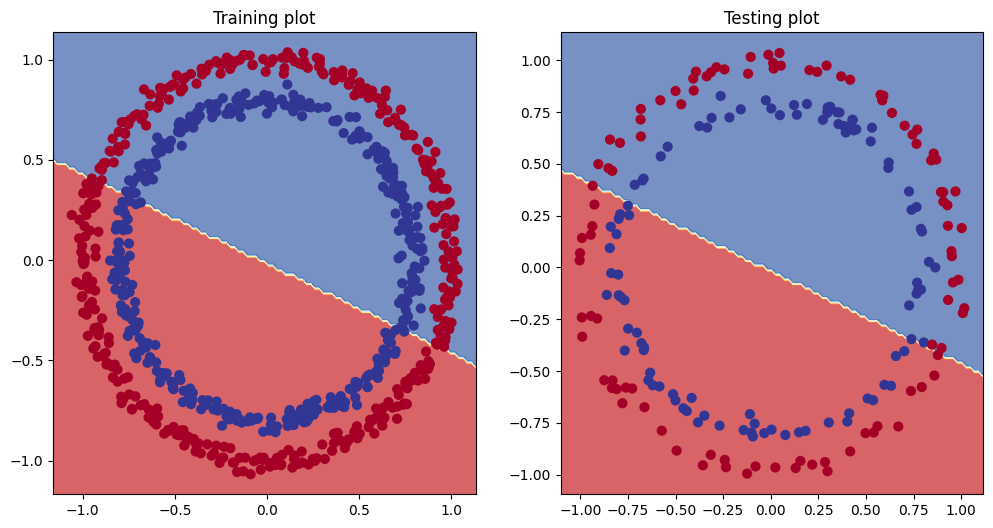

In [ ]:
#ploting the decision boundarys

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training plot")
plot_decision_boundary(new_model,X_train,Y_train)

plt.subplot(1,2,2)
plt.title("Testing plot")
plot_decision_boundary(new_model,X_test,Y_test)

In [ ]:
# class Circle_modelv1(nn.Module):
#   def __init(self):
#     super().__init__()

#     self.layers=nn.Sequential(nn.Linear(in_features=2,out_features=128),
#                               nn.ReLu(),
#                               nn.Linear(in_features=128,out_feature=256),
#                               nn.ReLu(),
#                               nn.Linear(in_features=256,out_features=1))





In [ ]:
class Circle_modelv1(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer1=nn.Linear(in_features=2,out_features=10)
    self.layer2=nn.Linear(in_features=10,out_features=10)
    self.layer3=nn.Linear(in_features=10,out_features=1)

  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.layer3(self.layer2(self.layer1(x)))



In [ ]:
model_v1=Circle_modelv1()

In [ ]:
#setting up the loss function
torch.manual_seed(42)
loss_fn=nn.BCEWithLogitsLoss()


#
optimizer=torch.optim.SGD(params=model_v1.parameters(),
                          lr=0.1)





In [ ]:
#Traing and testing loop

epochs=1000

for epoch in range(epochs):
  model_v1.train()

  #Forward pass()
  Y_logits=model_v1(X_train).squeeze()
  Y_preds_pro=torch.round(Y_logits.sigmoid())

  #calculate the loss
  loss=loss_fn(Y_logits,Y_train)

  #optimize the zero grad
  optimizer.zero_grad()

  #loss backwards
  loss.backward()


  #oprimizer step
  optimizer.step()


  #testing loop
  model_v1.eval()
  with torch.inference_mode():
    test_logits=model_v1(X_test).squeeze()
    test_preds=torch.round(torch.sigmoid(test_logits))


  test_loss=loss_fn(test_logits,Y_test)

  print(f"traing loss={loss} | test loss={test_loss}")








traing loss=0.6939550638198853 | test loss=0.6926146149635315
traing loss=0.6939218640327454 | test loss=0.6926200985908508
traing loss=0.6938905119895935 | test loss=0.6926267147064209
traing loss=0.6938607692718506 | test loss=0.692634105682373
traing loss=0.6938326358795166 | test loss=0.6926423907279968
traing loss=0.6938056945800781 | test loss=0.6926512718200684
traing loss=0.6937800645828247 | test loss=0.6926608085632324
traing loss=0.693755567073822 | test loss=0.6926708817481995
traing loss=0.6937321424484253 | test loss=0.6926814317703247
traing loss=0.6937097311019897 | test loss=0.6926923394203186
traing loss=0.6936882138252258 | test loss=0.6927037239074707
traing loss=0.6936675906181335 | test loss=0.6927154064178467
traing loss=0.6936477422714233 | test loss=0.6927273273468018
traing loss=0.6936285495758057 | test loss=0.6927395462989807
traing loss=0.6936102509498596 | test loss=0.6927520632743835
traing loss=0.6935925483703613 | test loss=0.6927646398544312
traing los

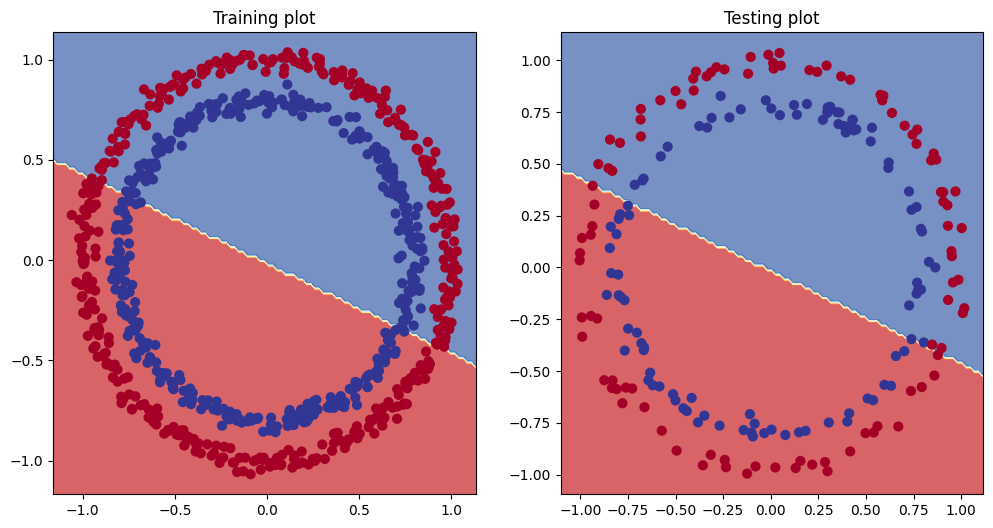

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training plot")
plot_decision_boundary(model_v1,X_train,Y_train)

plt.subplot(1,2,2)
plt.title("Testing plot")
plot_decision_boundary(model_v1,X_test,Y_test)

In [ ]:
#implementing the starting data

weight=0.7
bias=0.3

start=0
end=1
step=0.01

X_regression=torch.arange(start,end,step).unsqueeze(dim=1)
Y_regression=weight * X_regression + bias

In [ ]:
# spliting the data into training and testing

split=int(0.8*len(X_regression))

X_train_r,Y_train_r=X_regression[:split],Y_regression[:split]
X_test_r,Y_test_r=X_regression[split:],Y_regression[split:]

print(len(X_train))
print(len(X_test))


800
200


In [ ]:
from helper_functions import plot_predictions

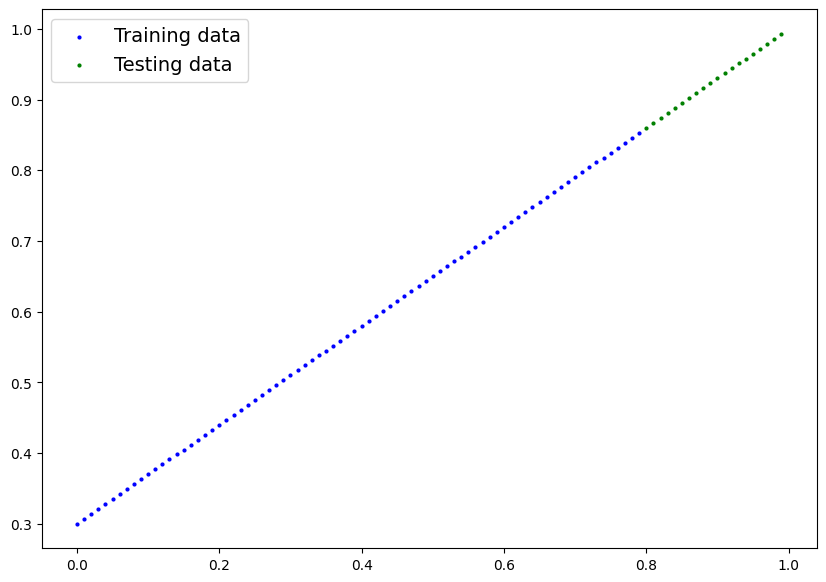

In [ ]:
plot_predictions(train_data=X_train_r,
                 train_labels=Y_train_r,
                 test_data=X_test_r,
                 test_labels=Y_test_r)

In [ ]:
# Fit our model to this data

model_2=nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1)
)

In [ ]:
loss_fn=nn.L1Loss()

optimizer=torch.optim.SGD(params=model_2.parameters(),
                          lr=0.01)

In [ ]:
#traing the data

torch.manual_seed(42)

epochs=1000

for epoch in range(epochs):
  model_2.train()

  Y_preds_r=model_2(X_train_r)

  loss=loss_fn(Y_preds_r,Y_train_r)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  #testing loop
  with torch.inference_mode():

    test_preds_r=model_2(X_test_r)

    test_loss_r=loss_fn(test_preds_r,Y_test_r)


  print(f"Training loss = {loss} | testing loss= {test_loss_r} ")








Training loss = 0.7598584890365601 | testing loss= 0.9110288619995117 
Training loss = 0.7220189571380615 | testing loss= 0.8687067031860352 
Training loss = 0.6847914457321167 | testing loss= 0.8269279599189758 
Training loss = 0.6481181979179382 | testing loss= 0.785627007484436 
Training loss = 0.6119429469108582 | testing loss= 0.7447402477264404 
Training loss = 0.5762114524841309 | testing loss= 0.7042056322097778 
Training loss = 0.5408707857131958 | testing loss= 0.6639627814292908 
Training loss = 0.5058695077896118 | testing loss= 0.6239525079727173 
Training loss = 0.47115737199783325 | testing loss= 0.5841164588928223 
Training loss = 0.4366849958896637 | testing loss= 0.5443975925445557 
Training loss = 0.4024040102958679 | testing loss= 0.5047394037246704 
Training loss = 0.3682669699192047 | testing loss= 0.4650861322879791 
Training loss = 0.3342267572879791 | testing loss= 0.4253823161125183 
Training loss = 0.30023694038391113 | testing loss= 0.3855729103088379 
Train

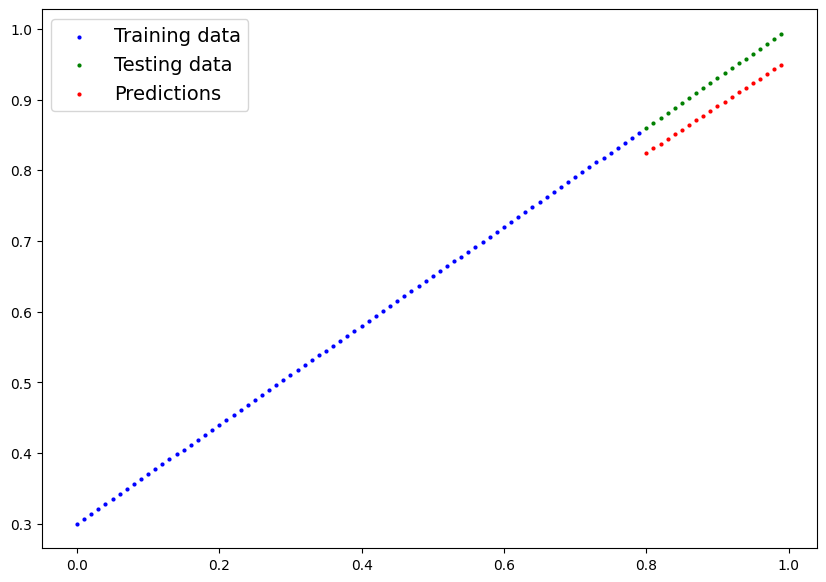

In [ ]:
with torch.inference_mode():
  Y_reg_pred=model_2(X_test_r)

plot_predictions(train_data=X_train_r,
                train_labels=Y_train_r,
                test_data=X_test_r,
                test_labels=Y_test_r,
                predictions=Y_reg_pred
                )

## The Missing piece : Non_Linearity


In [ ]:
#creating the circle data and visualize it

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [ ]:
n_sample=1000
X,Y=make_circles(n_sample,
                         noise=0.03,
                         random_state=42)

In [ ]:
X[:10],Y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

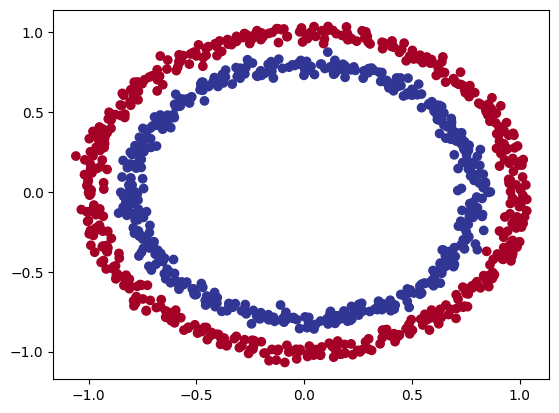

In [ ]:
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=Y,
            cmap=plt.cm.RdYlBu)

In [ ]:
# Spliting the data into training and testing

from sklearn.model_selection import train_test_split

# converting the X,Y into tensores

X=torch.from_numpy(X).type(torch.float)
Y=torch.from_numpy(Y).type(torch.float)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,
                                               Y,
                                               test_size=0.2,
                                               random_state=42)

print(X_train[:5],Y_train[:5],X_test[:5],Y_test[:5])

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        [-0.9666, -0.2256],
        [-0.1666,  0.7994]]) tensor([1., 0., 0., 0., 1.]) tensor([[-0.3752,  0.6827],
        [ 0.0154,  0.9600],
        [-0.7028, -0.3147],
        [-0.2853,  0.9664],
        [ 0.4024, -0.7438]]) tensor([1., 0., 1., 0., 1.])


In [ ]:
len(X_train), len(X_test) , len(Y_train) ,len(Y_test)

(800, 200, 800, 200)

In [ ]:
## Building our new Model with non-linear Activation Functions


from torch import nn

class CircleModelv2(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)
    self.relu=nn.ReLU()


  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


model_3=CircleModelv2()


In [ ]:
model_3

CircleModelv2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
torch.manual_seed(42)
loss_fn=nn.BCEWithLogitsLoss()


#
optimizer=torch.optim.SGD(params=model_3.parameters(),
                          lr=0.1)

In [ ]:
# traing and testing loop

epochs=1000

for epoch in range(epochs):
  model_3.train()

  Y_logits=model_3(X_train).squeeze()
  Y_pred_prob=torch.round(torch.sigmoid(Y_logits))

  acc=accuracy_fn(Y_true=Y_train,
                  Y_pred=Y_pred_prob)



  loss=loss_fn(Y_logits,Y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()


  #testing loop

  model_3.eval()

  with torch.inference_mode():
    test_logits=model_3(X_test).squeeze()
    test_pred_prob=torch.round(torch.sigmoid(test_logits))

    test_acc=accuracy_fn(Y_true=Y_test,
                         Y_pred=test_pred_prob)

    test_loss=loss_fn(test_logits,Y_test)


  if epoch %10==0:

    print(f"training loss: {loss} | training accuracy: {acc} | test loss: {test_loss} | test accuracy: {test_acc}")

training loss: 0.6929463148117065 | training accuracy: 50.0 | test loss: 0.6931881904602051 | test accuracy: 50.0
training loss: 0.692476212978363 | training accuracy: 50.5 | test loss: 0.6925959587097168 | test accuracy: 50.0
training loss: 0.6922457814216614 | training accuracy: 59.12500000000001 | test loss: 0.6923112273216248 | test accuracy: 56.49999999999999
training loss: 0.6920924186706543 | training accuracy: 70.25 | test loss: 0.6921225786209106 | test accuracy: 68.0
training loss: 0.6919484734535217 | training accuracy: 68.375 | test loss: 0.6919479966163635 | test accuracy: 71.0
training loss: 0.6918084025382996 | training accuracy: 58.25 | test loss: 0.6917727589607239 | test accuracy: 57.99999999999999
training loss: 0.6916752457618713 | training accuracy: 54.0 | test loss: 0.691611647605896 | test accuracy: 54.50000000000001
training loss: 0.6915476322174072 | training accuracy: 53.125 | test loss: 0.6914635300636292 | test accuracy: 53.0
training loss: 0.691412746906280

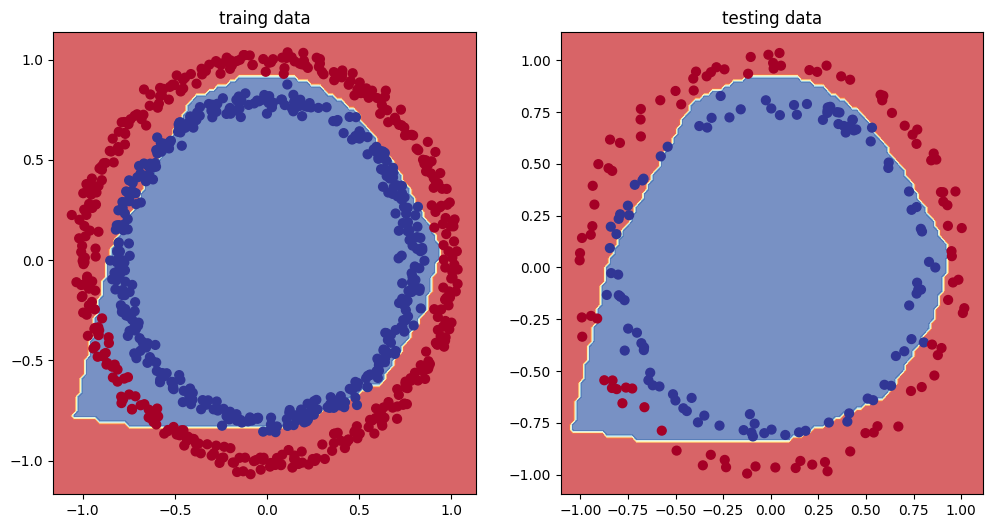

In [ ]:
from helper_functions import plot_decision_boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("traing data")
plot_decision_boundary(model_3,X_train,Y_train)
plt.subplot(1,2,2)
plt.title("testing data")
plot_decision_boundary(model_3,X_test,Y_test)

# Replecating non linear activation function

In [ ]:
A=torch.arange(-10,10,1,dtype=torch.float32)

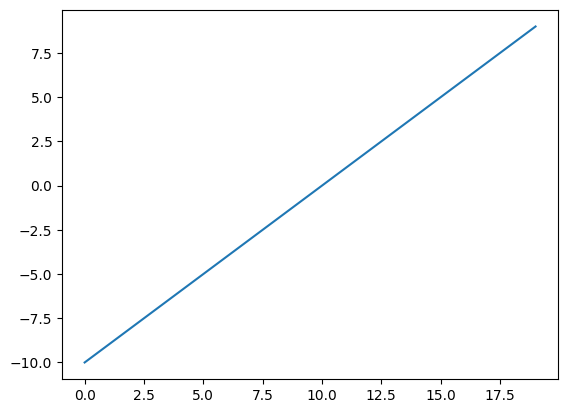

In [ ]:
plt.plot(A)

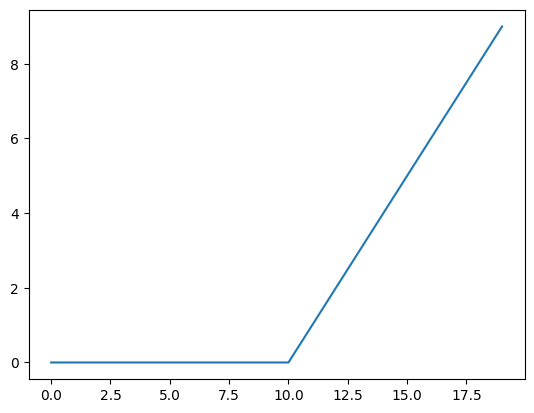

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def relu(x:torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0),x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

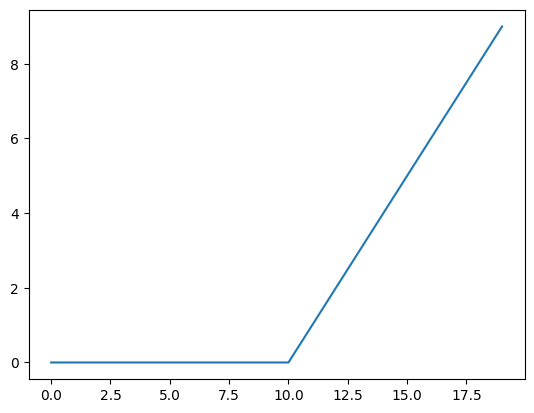

In [ ]:
#plot relu
plt.plot(relu(A))

In [ ]:
# creating a cunstom sigmoid function

def sigmoid(x):
  return 1/(1+torch.exp((-x)))

sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

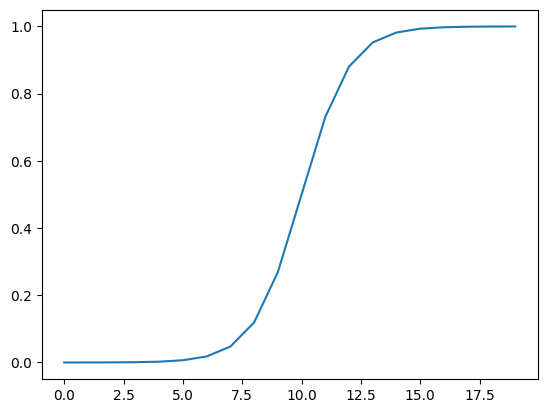

In [ ]:
plt.plot(sigmoid(A))

In [ ]:
from sklearn.datasets import make_blobs
n_samples=1000

In [ ]:
X,Y=make_blobs(n_samples,
               n_features=2,
               centers=4,
               cluster_std=1.3,
               random_state=42
               )

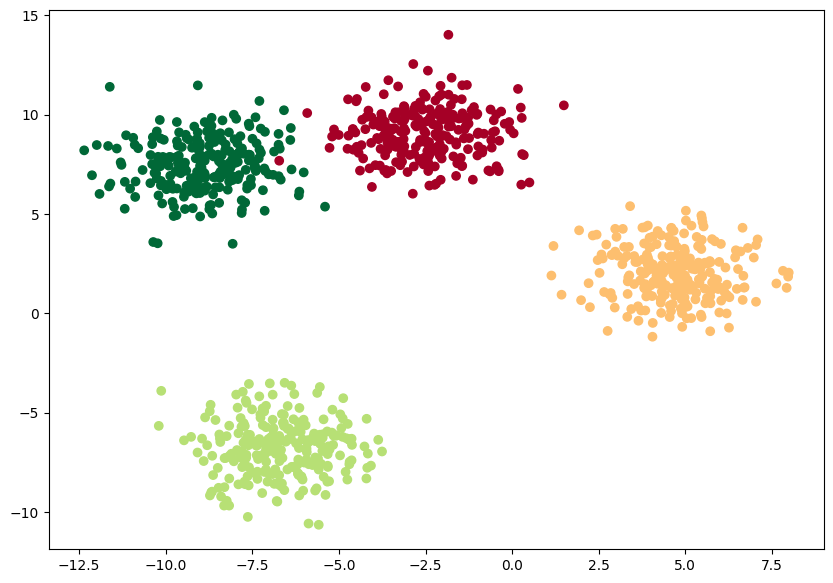

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=Y,
            cmap=plt.cm.RdYlGn)

In [ ]:
import torch
from sklearn.model_selection import train_test_split
X=torch.from_numpy(X).type(torch.float)
Y=torch.from_numpy(Y).type(torch.LongTensor)

X_train,X_test,Y_train,Y_test=train_test_split(X,
                                               Y,
                                               test_size=0.2,
                                               random_state=42)

len(X_train)

800

In [ ]:
## Creating a model for multiclass classification


device= "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
#Creating blob class to create a model
from torch import nn

class BlobModelv0(nn.Module):
  def __init__(self,input_feature,output_feature,hidden_unit=8):

    super().__init__()

    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_feature,out_features=hidden_unit),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_unit,out_features=hidden_unit),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_unit,out_features=output_feature)
    )


  def forward(self,x:torch.Tensor) ->torch.Tensor:
    return self.linear_layer_stack(x)



In [ ]:
model_blob=BlobModelv0(input_feature=2,output_feature=4).to(device)

In [ ]:
model_blob.state_dict()

OrderedDict([('linear_layer_stack.0.weight',
              tensor([[-0.5740,  0.0765],
                      [ 0.2095, -0.3265],
                      [-0.1978,  0.4776],
                      [ 0.0563,  0.0319],
                      [-0.1740, -0.6403],
                      [-0.6649, -0.3380],
                      [-0.3594,  0.2203],
                      [-0.2058, -0.2766]])),
             ('linear_layer_stack.0.bias',
              tensor([ 0.6742,  0.2463,  0.5041, -0.3423, -0.2888,  0.2599, -0.4711, -0.4622])),
             ('linear_layer_stack.1.weight',
              tensor([[-0.0171, -0.1293, -0.2650,  0.2097,  0.2843,  0.0574, -0.0616, -0.3275],
                      [-0.1288,  0.0900,  0.1667, -0.0447, -0.1398,  0.1970, -0.2816,  0.2235],
                      [-0.1372,  0.0054, -0.0699,  0.0429, -0.1068,  0.2571, -0.0092,  0.2760],
                      [ 0.3399, -0.1722, -0.2579,  0.2837,  0.2770, -0.2700, -0.0273, -0.3486],
                      [-0.2894,  0.0683,  0.094

In [ ]:
#create a loss function and optimizer

In [ ]:
# Creating a loss function i.e CROSS ENTROPY LOSSS

loss_fn=nn.CrossEntropyLoss()

# Creating a optimizer i.e gradient descent
optimizer= torch.optim.SGD(params=model_blob.parameters(),
                           lr=0.1)


In [ ]:
model_blob.eval()
with torch.inference_mode():
  Y_logits=model_blob(X_test)
  Y_pred_prob=(torch.softmax(Y_logits,dim=1))

print(Y_logits[:10])
print(Y_pred_prob[:10])

tensor([[ 0.8527,  0.3599, -0.0861,  0.0427],
        [ 0.0493,  0.0730,  1.6117, -1.3489],
        [-0.0916, -1.0401, -0.0675,  0.3230],
        [ 0.7454,  0.0942, -0.2822,  0.2666],
        [ 0.6140,  0.6275,  1.0748, -1.0070],
        [-0.0374,  0.0808,  1.8672, -1.5691],
        [ 0.0042, -1.0277, -0.3105,  0.5282],
        [ 0.4792,  0.4777,  1.1706, -1.0573],
        [-0.2562, -1.1185,  0.2437,  0.0734],
        [ 0.5275,  0.5212,  1.1174, -1.0209]])
tensor([[0.4087, 0.2497, 0.1598, 0.1818],
        [0.1420, 0.1454, 0.6775, 0.0351],
        [0.2548, 0.0987, 0.2609, 0.3856],
        [0.4002, 0.2087, 0.1432, 0.2479],
        [0.2634, 0.2670, 0.4176, 0.0521],
        [0.1104, 0.1242, 0.7415, 0.0239],
        [0.2649, 0.0944, 0.1934, 0.4473],
        [0.2375, 0.2372, 0.4742, 0.0511],
        [0.2242, 0.0946, 0.3695, 0.3117],
        [0.2494, 0.2478, 0.4498, 0.0530]])


In [ ]:
Y_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [ ]:
torch.sum(Y_pred_prob[0])

tensor(1.)

# * Creating a training and a testing loop for the multi class classification problem

In [ ]:
# Setting the epochs

epochs=1000

for epoch in range(epochs):
  model_blob.train()

  Y_logits=model_blob(X_train)
  Y_pred_prob=torch.softmax(Y_logits,dim=1).argmax(dim=1)

  acc=accuracy_fn(Y_true=Y_train,Y_pred=Y_pred_prob)

  loss=loss_fn(Y_logits,Y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_blob.eval()
  with torch.inference_mode():

    test_logits=model_blob(X_test)
    test_pred_prob=torch.softmax(test_logits,dim=1).argmax(dim=1)

    test_acc=accuracy_fn(Y_true=Y_test,Y_pred=test_pred_prob)

    test_loss=loss_fn(test_logits,Y_test)

  print(f"Train loss : {loss} | Train_Accuracy : {acc} | Test loss : {test_loss} | Test accuracy : {test_acc}")










Train loss : 1.9299792051315308 | Train_Accuracy : 9.0 | Test loss : 0.8763302564620972 | Test accuracy : 78.5
Train loss : 0.903430700302124 | Train_Accuracy : 72.25 | Test loss : 0.6835849285125732 | Test accuracy : 77.5
Train loss : 0.7192329168319702 | Train_Accuracy : 70.625 | Test loss : 0.5679270029067993 | Test accuracy : 82.0
Train loss : 0.6011154055595398 | Train_Accuracy : 77.125 | Test loss : 0.48054152727127075 | Test accuracy : 94.0
Train loss : 0.5080983638763428 | Train_Accuracy : 92.375 | Test loss : 0.4093729853630066 | Test accuracy : 98.5
Train loss : 0.4311404526233673 | Train_Accuracy : 97.0 | Test loss : 0.350220263004303 | Test accuracy : 99.0
Train loss : 0.3669818043708801 | Train_Accuracy : 99.0 | Test loss : 0.30105170607566833 | Test accuracy : 99.0
Train loss : 0.31386086344718933 | Train_Accuracy : 99.5 | Test loss : 0.26043424010276794 | Test accuracy : 99.5
Train loss : 0.2703309655189514 | Train_Accuracy : 99.625 | Test loss : 0.22705012559890747 | Te

In [ ]:
from helper_functions import plot_decision_boundary

In [ ]:
model_blob.eval()
with torch.inference_mode():
  Y_logits1=model_blob(X_test)

print(Y_logits1[:10])

tensor([[ 12.1774,  24.3744, -17.8309, -10.5666],
        [  3.1362, -28.5596,   1.4104,  12.8280],
        [-17.4251, -32.8732,  26.5927,  13.8154],
        [  6.9103,  18.3660, -10.5952,  -8.1077],
        [ 15.7903,   6.9943, -19.3529,  -2.5802],
        [  2.8519, -34.4591,   2.6931,  15.4688],
        [-16.7378, -26.4640,  24.7482,  10.9639],
        [ 12.4592,  -1.4118, -14.0397,   1.0470],
        [-19.6292, -43.6268,  30.9390,  18.5510],
        [ 13.4702,   1.6446, -15.7331,  -0.2811]])


In [ ]:
Y_pred_prob=torch.softmax(Y_logits1,dim=1).argmax(dim=1)

print(Y_pred_prob[:10])

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])


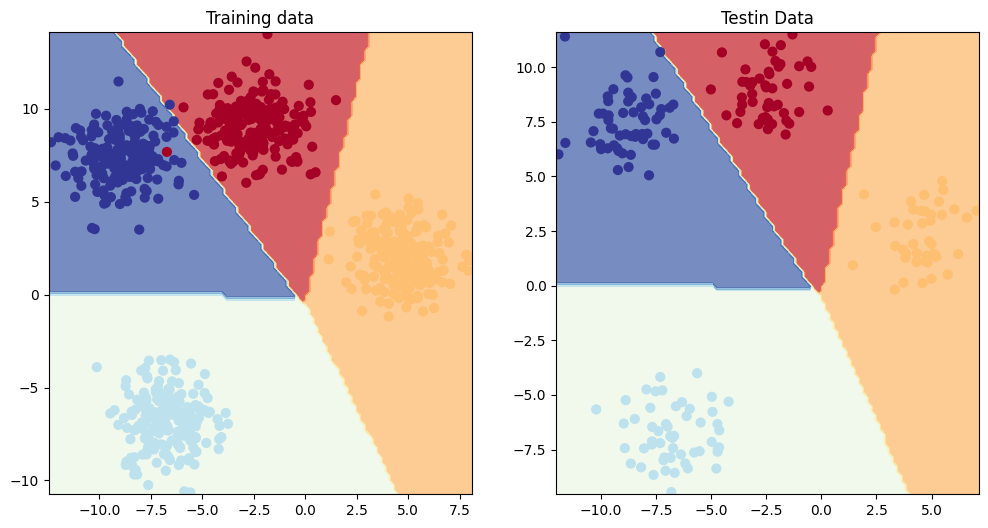

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training data")
plot_decision_boundary(model_blob,X_train,Y_train)
plt.subplot(1,2,2)
plt.title("Testin Data")
plot_decision_boundary(model_blob,X_test,Y_test)